# Title:

#### Group Member Names : AAVASH K C

### INTRODUCTION:

#### Aim:
This project aims to explore and extend the capabilities of GluonTS by reproducing results from the research paper "GluonTS: Probabilistic Time Series Models in Python" and making a significant methodological contribution. Specifically, the focus will be on comparing the Gluon model with Prophet model and checking which model is better suited for timeseries forecasting. By leveraging GluonTS, this project seeks to address key challenges in time series modeling while contributing valuable insights for practical applications.

#### Github Link:
https://github.com/awslabs/gluonts

#### Description Of Paper:

The research paper titled "GluonTS: Probabilistic Time Series Models in Python" introduces Gluon Time Series (GluonTS), a Python library tailored for time series modeling tasks like forecasting and anomaly detection. Developed by Alexander Alexandrov et al., GluonTS aims to facilitate experimentation and model development through a deep learning approach.

#### Problem statement:
Time series data is ubiquitous across various domains, including finance, supply chain management, healthcare, and environmental monitoring. Developing effective models for forecasting and anomaly detection in time series is critical for decision-making, resource optimization, and risk management. However, traditional time series models often face limitations when handling large-scale, high-dimensional, and irregularly spaced datasets.

Deep learning-based time series methods have emerged as powerful tools to address these challenges. Gluon Time Series (GluonTS) is a Python-based library designed to simplify the development, experimentation, and evaluation of such models. It offers a comprehensive toolkit for building probabilistic forecasting models, enabling researchers and practitioners to better capture uncertainty and enhance model reliability.



#### Background:

|Reference|Explanation|Dataset/Input|Weakness|
|:------:|:------:|:------:|:------:|
| GluonTS: Probabilistic Time Series Models in Python | GluonTS is a Python library designed for probabilistic time series modeling, enabling easy experimentation and evaluation of forecasting models. It provides tools for tasks like anomaly detection and uncertainty quantification. | Pre-built datasets from the library or custom time series data (e.g., energy consumption, stock prices, weather data). | Limited support for non-sequential data and dependency on significant computational resources for large-scale models. |



# Implement paper code :

In [3]:
#installing the necessary libraries
# install with support for torch models
!pip install "gluonts[torch]"

# install with support for mxnet models
!pip install "gluonts[mxnet]"

   ---------------------------------------- 0.0/811.0 kB ? eta -:--:--
   ------------------------------------- - 786.4/811.0 kB 35.0 MB/s eta 0:00:01
   ---------------------------------------- 811.0/811.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------- -- 1.8/2.0 MB 33.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 33.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 33.5 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/815.2 kB ? eta -:--:--
   ------------------------------------- - 786.4/815.2 kB 35.0 MB/s eta 0:00:01
   ---------------------------------------- 815.2/815.2 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 33.8 MB/s eta 0:00:01
   -------------

     ---------------------------------------- 0.0/5.1 MB ? eta -:--:--
     ------------------------------------ --- 4.7/5.1 MB 28.6 MB/s eta 0:00:01
     ---------------------------------------- 5.1/5.1 MB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [1 lines of output]
  ERROR: Can not execute `setup.py` since setuptools is not available in the build environment.
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [2]:
# Loading data from a CSV file into a PandasDataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [3]:
dataset = PandasDataset(df, target="#Passengers")

In [4]:
# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-36)
test_data = test_gen.generate_instances(prediction_length=12, windows=3)

In [5]:
# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=12, freq="M", trainer_kwargs={"max_epochs": 5}
).train(training_data)

forecasts = list(model.predict(test_data.input))


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
C:\Users\Administrator\anaconda3\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | Mode  | In sizes                                                   | Out sizes   
--------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | train | [[1, 1], [1, 1], [1, 48, 2], [1, 48], [1, 48], [1, 12, 2]] | [1, 100, 12]
--------------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)
11        Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

Epoch 0, global step 50: 'train_loss' reached 5.70259 (best 5.70259), saving model to 'D:\\Georgian\\AIDI\\AIDI_1002\\FinalProject\\lightning_logs\\version_2\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 4.78090 (best 4.78090), saving model to 'D:\\Georgian\\AIDI\\AIDI_1002\\FinalProject\\lightning_logs\\version_2\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 4.50864 (best 4.50864), saving model to 'D:\\Georgian\\AIDI\\AIDI_1002\\FinalProject\\lightning_logs\\version_2\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 4.32744 (best 4.32744), saving model to 'D:\\Georgian\\AIDI\\AIDI_1002\\FinalProject\\lightning_logs\\version_2\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 4.25272 (best 4.25272), saving model to 'D:\\Georgian\\AIDI\\AIDI_1002\\FinalProject\\lightning_logs\\version_2\\checkpoints\\epoch=4-s

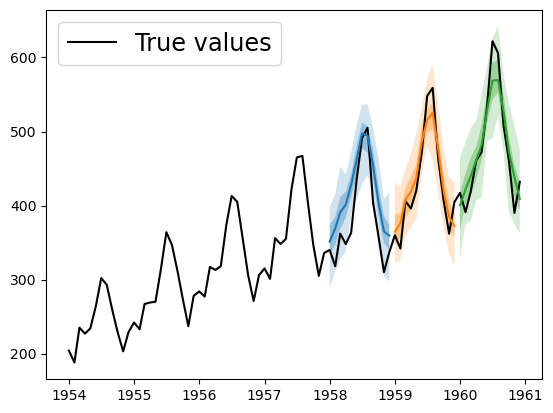

In [6]:
# Plot predictions
plt.plot(df["1954":], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left", fontsize="xx-large")
plt.show()

### Contribution  Code :

In [ ]:
#installing the model
!pip install prophet

01:03:17 - cmdstanpy - INFO - Chain [1] start processing
01:03:17 - cmdstanpy - INFO - Chain [1] done processing


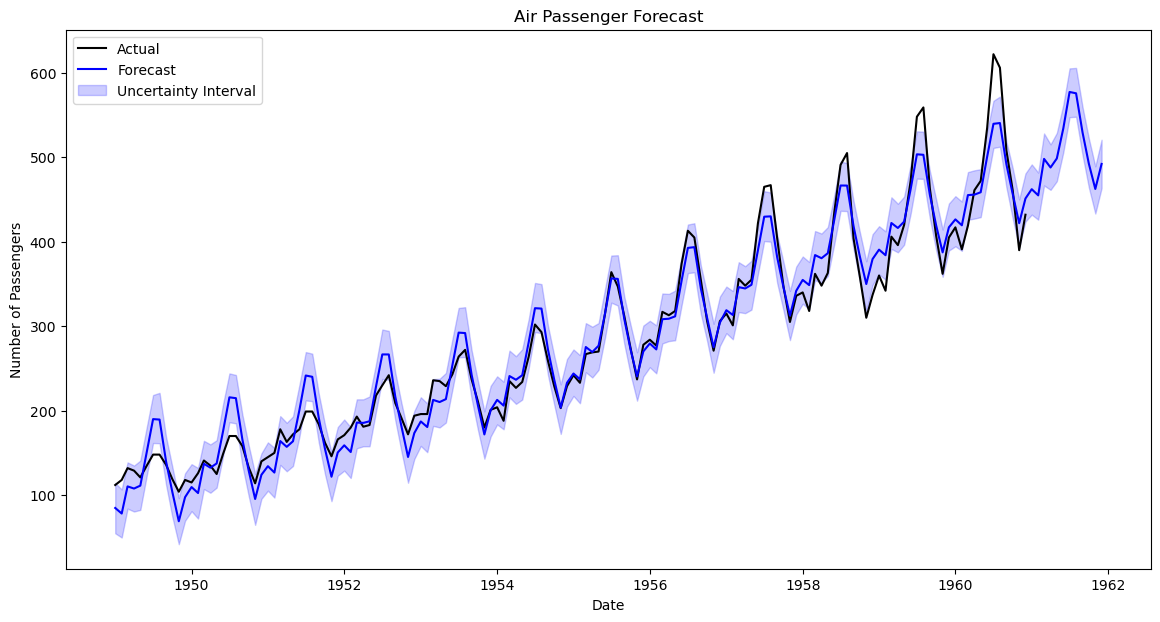

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load data from a CSV file
df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/"
    "TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv",
    index_col=0,
    parse_dates=True,
)

# Preparing the data for Prophet
df.reset_index(inplace=True)
df.columns = ['ds', 'y']  # Prophet requires columns to be named 'ds' (date) and 'y' (target)

# Creating and fiting the Prophet model
model = Prophet(seasonality_mode='additive')  # Default setting, can use 'multiplicative' for multiplicative seasonality
model.fit(df)

# Making future dataframe for predictions
future = model.make_future_dataframe(periods=12, freq='M')

# Forecast
forecast = model.predict(future)

# Plot actual data and predictions
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], color='black', label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Forecast')
plt.fill_between(
    forecast['ds'].dt.to_pydatetime(), 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='blue', alpha=0.2, label='Uncertainty Interval'
)
plt.legend()
plt.title('Air Passenger Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()


### Results :
We can see from the above plots that both GluonTS and Prophet model were able to forecast the increase in passengers according to the months as well in both cases. But if we compare the two the plots we can see that GluonTs was able to forecast more accurately but it took longer than the prophet model.

#### Observations:
**GluonTS:** This deep learning-based model offered higher prediction accuracy, making it suitable for applications where precision is crucial. The trade-off is longer computational time, which can be a limiting factor in resource-constrained environments.

**Prophet:** This model was faster and easier to run, offering acceptable accuracy for use cases where speed and lower computational resources are prioritized over the highest precision.

#### Implications:
**GluonTS** is recommended for scenarios where accurate forecasting is critical, and computational resources are available.

**Prophet** is ideal when quick predictions are needed, and there is a tolerance for slightly lower accuracy.

### Conclusion:
The deep learning model GluonTs required more time to complete it's predections but were more accurate. So it the accuracy is of importance to GluonTs model is recommended Where as Prophet model took shorter time to make its predections in exchange for some of it's accuracy which means if accuracy is not of that much importance when compared to time and resource constraint Use of Prophet model could be more useful.

### References:

[1]:  https://arxiv.org/abs/1906.05264

1- https://arxiv.org/abs/1906.05264

2-  https://github.com/awslabs/gluonts

3-  https://ts.gluon.ai/stable/getting_started/background.html